In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



In [2]:
df = pd.read_csv('heart.csv')  # Update with the correct file path
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.target.value_counts() # df.target.unique()

1    526
0    499
Name: target, dtype: int64

In [4]:
disease = len(df[df['target'] == 1])
no_disease = len(df[df['target']== 0])

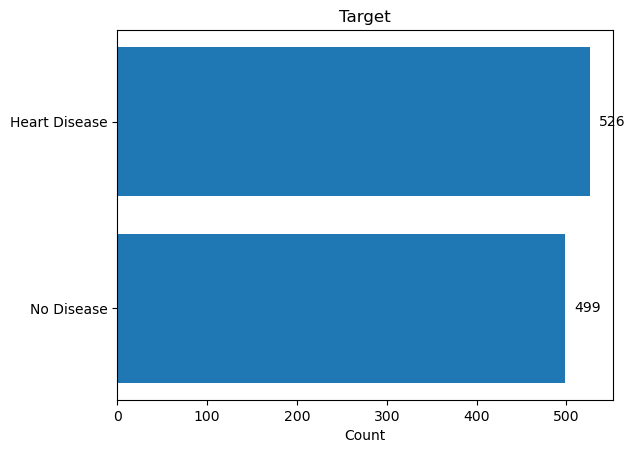

In [5]:

plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

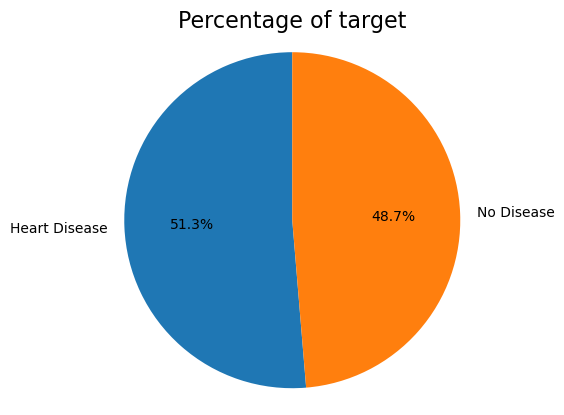

In [6]:
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:

In [7]:
# Preprocess the Data

X = df.drop('target', axis=1)  # Replace 'target' with your label column
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

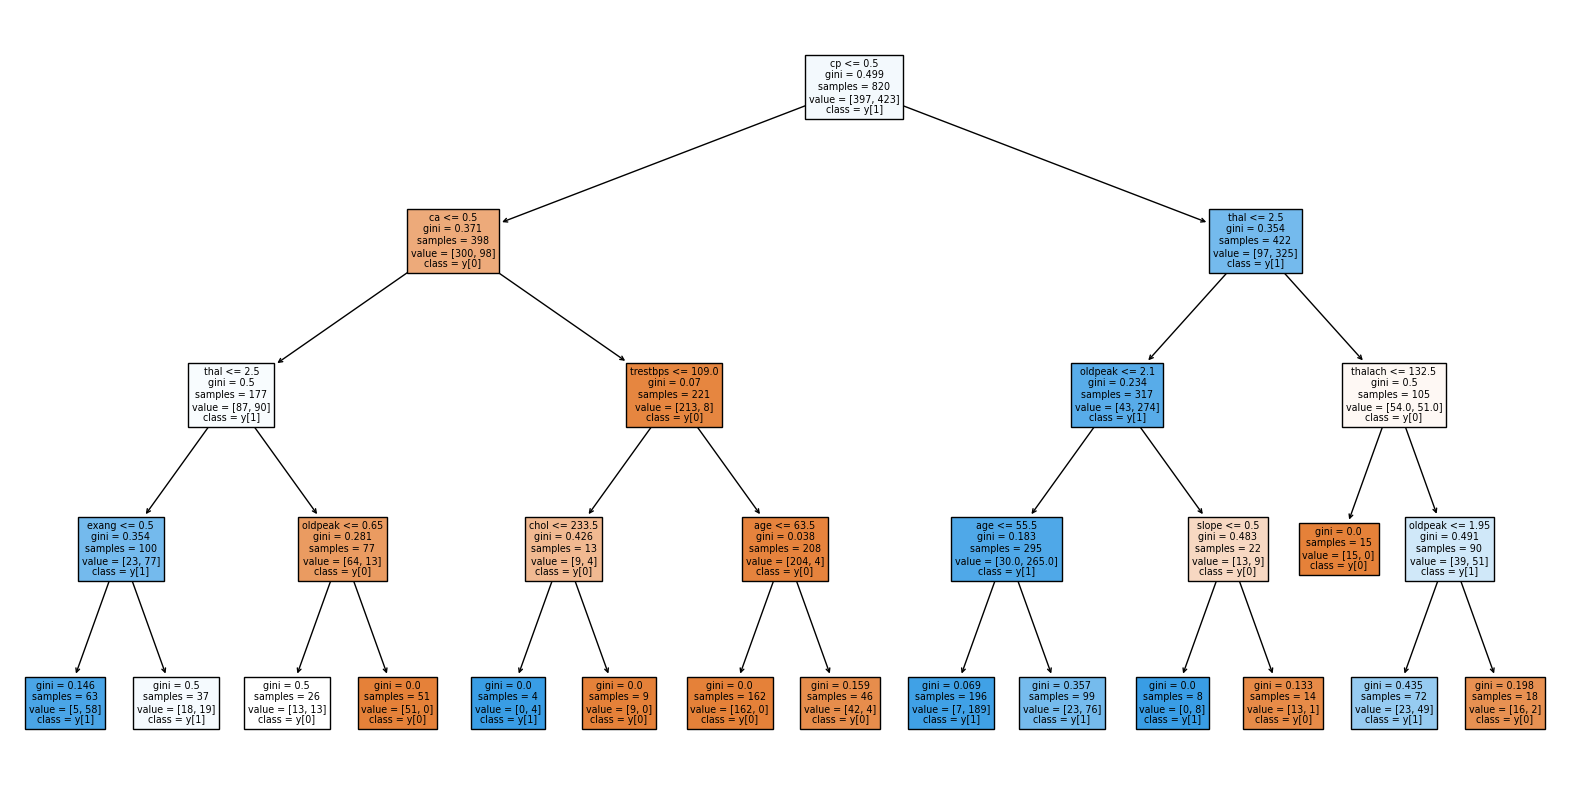

In [8]:
# Train a Decision Tree Classifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=True, filled=True)
plt.show()


In [9]:
# Evaluate the Model

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [10]:
# Train a Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.9853658536585366


In [11]:
#  Feature Importances

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

for i in indices:
    print(f"{X.columns[i]}: {importances[i]:.4f}")


cp: 0.1351
ca: 0.1273
thalach: 0.1222
oldpeak: 0.1219
thal: 0.1105
age: 0.0779
chol: 0.0748
trestbps: 0.0712
exang: 0.0576
slope: 0.0458
sex: 0.0287
restecg: 0.0186
fbs: 0.0084


In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.9970731707317073
